# Basic Charts

Producing charts intended for use as part of OU course materials is not necessarily a simple process.

Where charts are *scientific charts*, intended to visualise a specific situation or dataset accurately, there is a need to ensure that the course text - the definition of an equation, the setting of parameter values, the values of data items in a data table - matches the chart view. In some cases, specific values may be moved out of the main course text and closer to the chart item, being described as part of a figure caption, for example, but the chance for drift betweem text and chart is ever present.

In part, the need for this separation is a result of the production process: figures may be sketched by an author and then passed to an artist or media developer. The artist / developer may then redraw the item, and style it in a particular way appropriate for the intended output medium, such as print, or as a web graphic. In some cases, the same media asset may be appropriate for multiple output formats - an image appropriate for print may also be embedded as an image in a web page - but in other cases, different renderings may be required, for example, of the chart as a static print item or as an interactive web chart.

The actual look - or styling - of a chart object may also change depending on where it is to be used. For example, if course materials are reused in different contexts - full OU courses, or as part of a smaller OpenLearn unit - it might be appropriate to use to a different style for each chart (course style / colour theme, versus OpenLearn brand style). In this case, generating different styles for the same chart object presents an overhead, and may lead to errors or drift between the *content* of the chart items.

Accessibility requirements also mandate that textual descriptions of image assets, including charts, are provided. In many chart objects, metadata associated with key features of the chart, such as the chart title and axis labels and ranges are available as data. As such, they can be used directly to seed a textual description of the chart.

Maintenance of charts for long lived courses is another issue. If course materials are updated, for example using more recent facts or data than were used in an original presentation, or as a result of errata being identified and corrected, there is often a need to go round the whole *author-artist-author-editor* quality / checking process, even if the update is something as simple as the correction of a spelling mistake in a chart axis label. Finding ways to more directly support the *description* of a chart as part of the course materials themselves, and its direct rendering as a media asset to be embedded in the materials, reduces, if not removes altogether, the likelihood of introducing drift or errors into the final chart object compared to the original course materials.

The production of media assets used in assessment is another issue. In many cases, assessment materials may follow the form of previous assessments, although specifics may change. For example, providing a graphic "not drawn to scale" for a maths activity, labelled with one set of values in one presentation, a different set of values in another, both specific to the particular question being asked, may requires access to the original media item so that it can be edited and updated. How much easier would it be if the item could be rendered from a textual description of it, where only the text values need updating and the media object can then be re-rendered, automatically, accordingly?

An extension of this is that it may be possible to use a similar underlying process to provide personalised / self-test activities, where media objects are updated with specific values and presented to students individually as part of a possibly repeated self-assessment activity.

## Using Jupyter Notebooks to Create Simple Charts

Jupyter notebooks can be used to generate wide range of charts and data visualisations that can be embedded in a notebook, from print quality static images to rich interactive charts. Packages also exist to support the scripting of a wide variety of other diagram types, but they will be covered in a separate notebook.

Many of the libraries generate *chart objects* that are then styled to produce the final image asset. In the same way that the same HTML page can be rendered different using cascading style sheets (CSS), without making changes to the content, so too can charts be styled to use different presentational layouts, line styles, colours and thihnesses, and so on, without the need to change the underlying scientific "content" of the chart.

Chart libraries are also capable of producing different sorts of chart object from the same source description for display in different contexts. In the same way that OU-XML documents can be processed to produce different sorts of output document (PDFs for print, or download, for example, or HTML documents for delivery via the VLE), so too can chart libraries take the same chart construction recipe and use it to generate charts intended as high quality print items, or as ricj interactive HTML charts.

This notebook demonstrates how to create some simple charts using one of the packages installed by default in the Azure Notebooks envionment: Python *pandas*.

## Introducing `pandas`

The Python `pandas` package is package widely used by data scientists for working with tabular datasets. `pandas` is used heavily in the OU course *TM351 Data Management and Analysis* and is a key component in the OU / FutureLearn course *Learn to Code for Data Analysis*.

The `pandas` package provides a way to script data analyses so that they can be reproduced. (One of the problems associated with using spreadsheets is that it can often be hard to recreate an anlaysis, or the production of a particular chart, because you aren't necessarily sure what to put where, or what needs doing when, when updating the spreadsheet or revisiting it after a year or two away from it.)

The package includes a wide variety of tools for reading and writing data files, reshaping data sets, analysing them and charting them. In this example, we will use `pandas` in associated with a couple of other packages to show how we can create a simple chart from a randomly created datset.

`numpy` is a package for numerical computation that contains a wide number of functions that are using for generating numerical datasets.

The `random` package provides functions for generating random numbers.

In [82]:
import pandas as pd
import numpy as np
import random

#This ensures that chart objects are embedded in the notebook once produced
%matplotlib inline

Data can be loaded from datafiles (for example, CSV text files or Excel spreadsheet documents) and database connections or created programmatically, as in the following example.

In [3]:
#Number of data values we want to create
numpoints = 50

#Generate a one dimensional data frame containing a specified number of random values
df = pd.DataFrame({'x':np.arange(0, numpoints)})

#Print a count of the number of data items we produced
print('Number of items:',len(df))
print('The number we expected?', numpoints == len(df) )

#Show the first three rows of the dataset
df.head(3)

Number of items: 50
The number we expected? True


,x
0,0
1,1
2,2


With the data in a simple tabular data frame, we can add new volumns based on the first, in much the same way we might create new columns in a spreadsheet, the difference being here we actual create any new columns "in real time" to show exactly what we're doing.

In [4]:
#Generate a column with values proportional to the first column
df['y'] =  df['x'] / numpoints

#Generate a column with values inversely proportional to the first column
df['y2'] = 1 - df['y']

#Generate a column with values proportional to the first column with the addition of random noise
df['y3'] = df.apply(lambda x: x['y']+((random.random()/5) - 0.1), axis=1)

#Preview the data
df.head(10)

,x,y,y2,y3
0,0,0.00,1.00,0.036762
1,1,0.02,0.98,0.069940
2,2,0.04,0.96,0.077343
3,3,0.06,0.94,0.027838
4,4,0.08,0.92,0.147700
5,5,0.10,0.90,0.013392
6,6,0.12,0.88,0.134327
7,7,0.14,0.86,0.130356
8,8,0.16,0.84,0.204041
9,9,0.18,0.82,0.209573


## Plotting a `pandas` Dataframe

We can generate a chart using the `matplotlib` charting package directly from a dataframe. In this case, use the `x` column for the *x* values and the `y` column for the *y* values.

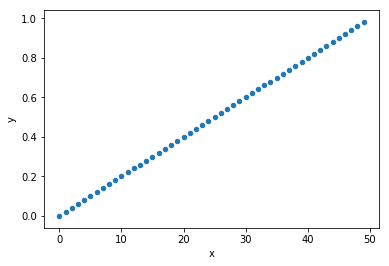

In [8]:
df.plot(kind='scatter', x='x', y='y');

It is easy enough to plot different values, and colour the points:

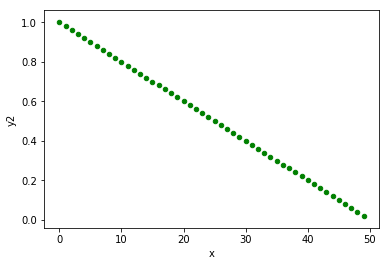

In [25]:
df.plot(kind='scatter', x='x', y='y2', color='green');

We can build up a chart from several separate layers, as well as controlling the display of chart text.

In the following example, we create a chart object on a set of axes, and then reuse those axes as we add further elements to the chart.

We can also control the display of the chart axis labels, or chart title.

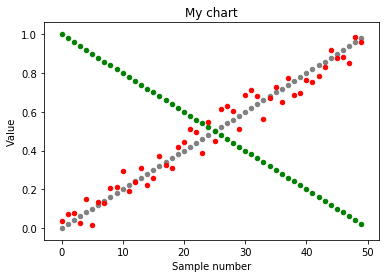

In [84]:
#Create a chart object we can add layers to
ax = df.plot(kind='scatter', x='x', y='y', color='grey', title='My chart')

#Add another layer
df.plot(kind='scatter', x='x', y='y2', color='green', ax=ax);

#And another
df.plot(kind='scatter', x='x', y='y3', color='red', ax=ax)

#Set the axis labels
ax.set_xlabel('Sample number')
ax.set_ylabel('Value');

### Focussing on a Particular Area of the Chart

If you want to highlight a particular region of the chart, the chart axis limits can be modified and redisplayed without affecting the underlying state of the chart or having to create a new chart from a range filtered subset of the original data.

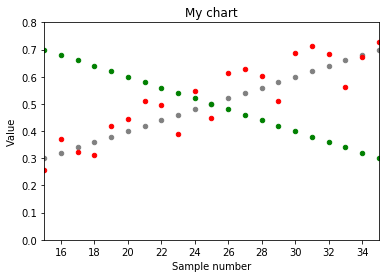

In [93]:
ax.set_xlim([15,35])
ax.set_ylim([0,0.8])

#This little trick ensures that only integer values are displayed as x-axis tick labels
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.get_figure()

## Using different chart types

A wide range of chart types can be plotted.

For example, as well as the scatter plot, we can generate a line chart. Note that the data we are using is the same as the data we used previously. In this case, each numerical column is added as a line to the chart automatically, apart from the column we defined as providing the values for the x-axis.

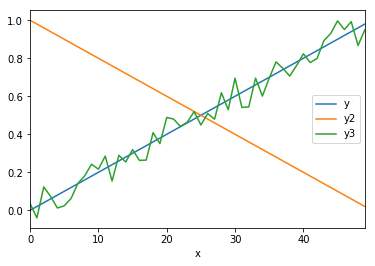

In [34]:
 df.plot(kind='line',x='x');

Let's preview the first few values in the `y3` column:

In [10]:
#Select the values in a column
df['y3'].head()

0   -0.075898
1   -0.013582
2   -0.019301
3    0.017668
4    0.100993
Name: y3, dtype: float64

You should see that they match the values depicted in the bar chart below:

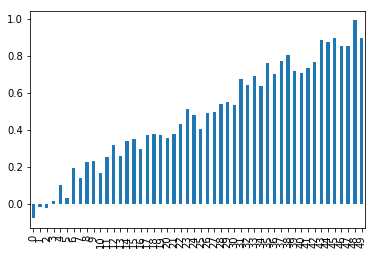

In [11]:
# Plot the values in a column as a bar chart
df['y3'].plot(kind='bar');

Sometimes bar charts are easier to read when the bars are presented in a horizontal, rather than vertical, fashion. That's easily done with a minot change to the chart definition:

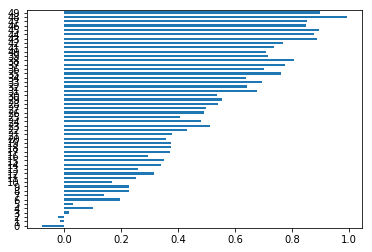

In [12]:
# Or as a horizontal bar chart
df['y3'].plot(kind='barh');

## Styling Charts

The chart objects produced can be rendered in a variety of styles without having to make changes to the actual chart.

The `seaborn` package can work on the chart objects generated from plots created from `pandas` dataframes to directly change their style without having to make any other changes to the chart creation / description statement.

In [5]:
import seaborn as sns

Let's see what we can achieve. How about a simple white theme with a background grid:

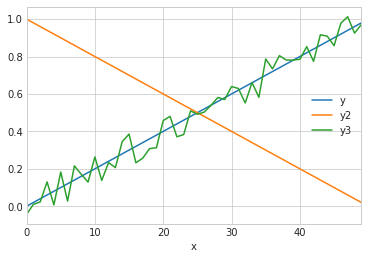

In [5]:
sns.set_style("whitegrid")

df.plot(kind='line',x='x');

Or how about a darker theme?

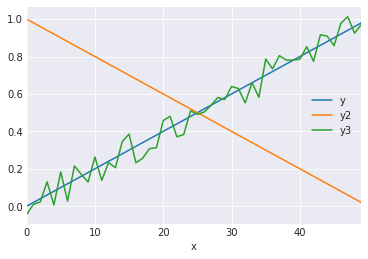

In [6]:
sns.set_style("darkgrid")

df.plot(kind='line',x='x');

As well as using predefined styles, we can customise the style of various chart components ourselves.

For example, let's make the chart pop out from the background a bit more:

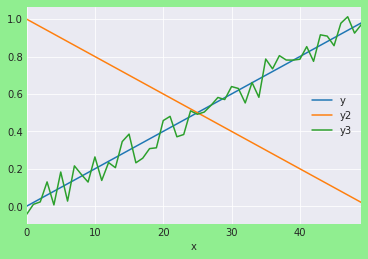

In [7]:
sns.set_style("darkgrid", {'figure.facecolor': 'lightgreen'})
df.plot(kind='line',x='x');

We can what components can be styled, as wel ass the current settings, using the following command:

In [8]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'lightgreen',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

We can also compare the settings from various charts. For example, gran the settings for the green background chart about and compare them with the white themed chart.

In [9]:
greenstyle = sns.axes_style().copy()
sns.set_style("whitegrid")
whitestyle = sns.axes_style()

#print any elements that are different
for s in greenstyle:
    if greenstyle[s]!=whitestyle[s]:
        print(s, greenstyle[s], whitestyle[s] )

figure.facecolor lightgreen white
axes.linewidth 0.0 1.0
axes.edgecolor white .8
axes.facecolor #EAEAF2 white
grid.color white .8


By observation, we can now start to style the chart ourselves. How about a pink, rather than grey, colour for the chart grid background? The `axes.facecolor` element looks a likely candidate:

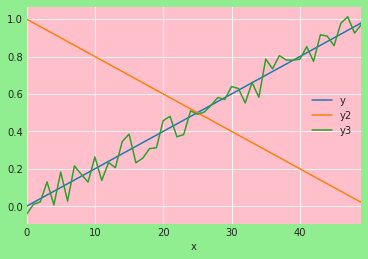

In [10]:
sns.set_style("darkgrid", {'figure.facecolor': 'lightgreen', 'axes.facecolor':'pink'})
df.plot(kind='line',x='x');

If you want to lighten the tone, you can also use an *XKCD* stle theme (*XKCD* is a web comic that often uses charts as part of a joke).

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


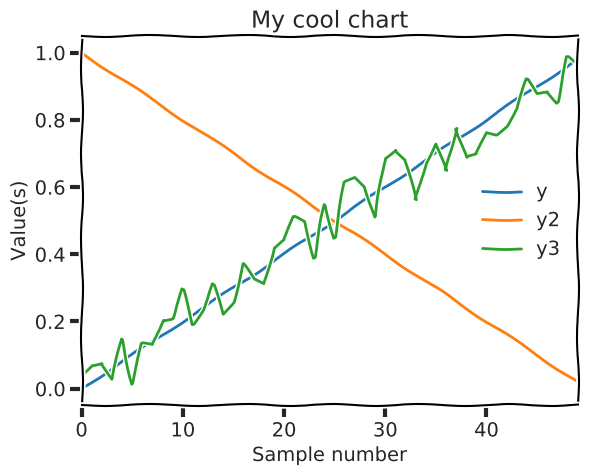

In [56]:
import matplotlib.pyplot as plt
sns.set_style('white')

#set xkcd mode
plt.xkcd();
ax = df.plot(kind='line',x='x', title='My cool chart');
ax.set_xlabel('Sample number')
ax.set_ylabel('Value(s)');

#Return to defaults
plt.rcdefaults()

## Saving Charts as Image Files

As well as displaying charts inline in the notebook, we can also save them as standalone image files in a variety of formats. For example:

- grab a `figure` object from the plot function: `fig = ax.get_figure()`
- save as a *png* file: `fig.savefig('path/to/file.png')`
- save as *pdf*: `fig.savefig("foo.pdf", bbox_inches='tight')`

In [57]:
!mkdir -p images/test

fig = ax.get_figure()
fig.savefig('./images/test/demochart.png')
fig.savefig('./images/test/demochart.pdf')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


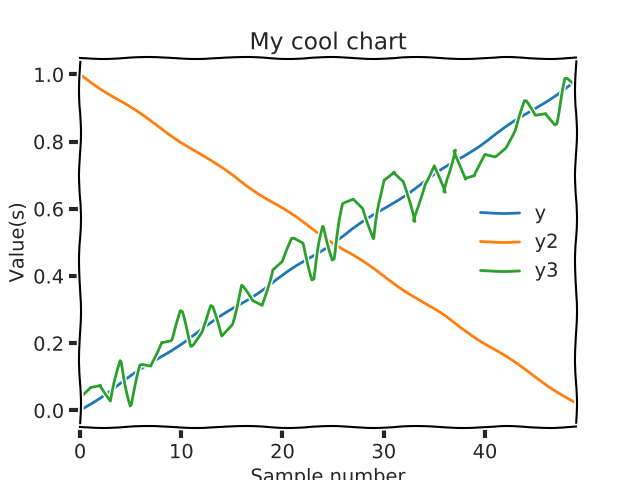

In [58]:
from IPython.display import Image
Image('./images/test/demochart.png')

In [59]:
from IPython.display import IFrame
IFrame("./images/test/demochart.pdf", width=600, height=650)

### Introspecting Charts - Supporting Simple Accessibility

As an axis object, there are various bits of information we can get from the chart that we can extract and use as the basis for very simple, automatically created text descriptions of certain chart attributes.

In [60]:
def get_plot_info(ax):
    ''' Extract some chart metadata. '''
    plot_info = {
        "title" : ax.get_title(),
        #"legend": ax.legend,
        "x_label": ax.xaxis.get_label_text(),
        "x_ticks": [t.get_text() for t in ax.xaxis.get_majorticklabels()],
        "y_label": ax.yaxis.get_label_text(),
        "y_ticks": [t.get_text() for t in ax.yaxis.get_majorticklabels()]
        }
    return plot_info

In [61]:
get_plot_info(ax)

{'title': 'My cool chart',
 'x_label': 'Sample number',
 'x_ticks': ['0', '10', '20', '30', '40', ''],
 'y_label': 'Value(s)',
 'y_ticks': ['', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '']}

In [78]:
def chartReader(ax):
    ''' Use chart metadata to provide a textual description of basic chart attributes. '''
    cr = get_plot_info(ax)
    cr['xmin']=min([int(x) for x in cr['x_ticks'] if x])
    cr['xmax']=max([int(x) for x in cr['x_ticks'] if x])
    cr['ymin']=min([float(x) for x in cr['y_ticks'] if x])
    cr['ymax']=max([float(x) for x in cr['y_ticks'] if x])
    txt='The chart titled "{title}" has x-axis "{x_label}" labeled from {xmin} to {xmax} and y-axis "{y_label}" labeled from {ymin} to {ymax}.'.format(**cr) 
    return txt

In [79]:
chartReader(ax)

'The chart titled "My cool chart" has x-axis "Sample number" labeled from 0 to 40 and y-axis "Value(s)" labeled from 0.0 to 1.0.'

We can also see a more complete list of axis properties that we can draw on when providing a basic textual chart description.

In [101]:
ax.properties()

{'adjustable': 'box',
 'agg_filter': None,
 'alpha': None,
 'anchor': 'C',
 'animated': False,
 'aspect': 'auto',
 'autoscale_on': False,
 'autoscalex_on': False,
 'autoscaley_on': False,
 'axes_locator': None,
 'axis_bgcolor': (1.0, 1.0, 1.0, 1),
 'axisbelow': 'line',
 'children': [<matplotlib.collections.PathCollection at 0x7f16ad7f3c18>,
  Text(0.5,1,'My chart'),
  Text(0,1,''),
  Text(1,1,''),
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_ratio': 0.04,
 'default_bbox_extra_artists': [<matplotlib.collections.PathCollection at 0x7f16ad7f3c18>,
  Text(0.5,1,'My chart'),
  Text(0,1,''),
  Text(1,1,''),
 'facecolor': (1.0, 1.0, 1.0, 1),
 'fc': (1.0, 1.0, 1.0, 1),
 'figure': <matplotlib.figure.Figure at 0x7f16ad641518>,
 'frame_on': True,
 'geometry': (1, 1, 1),
 'gid': None,
 'images': <a list of 0 AxesImage objects>,
 'label': '',
 'legend': None,
 'legend_handles_labels': ([], []),
 'lines': <a list of 0 Line2D objects>,
 'navigate': True,
 'naviga

## Generating web graphics from a chart

As well as generating "static" images, styked variously, we can also take a chart object and create an interactive HTML version of it.

The [`mpld3` package](http://mpld3.github.io/), which languished for several years, now seems to be being maintained again and provides a handy way of converting `pandas` generated matplotlib charts to interactive HTML charts.

In [34]:
%%capture
!pip install mpld3

First, we need to grab a `matplotlib` figure object:

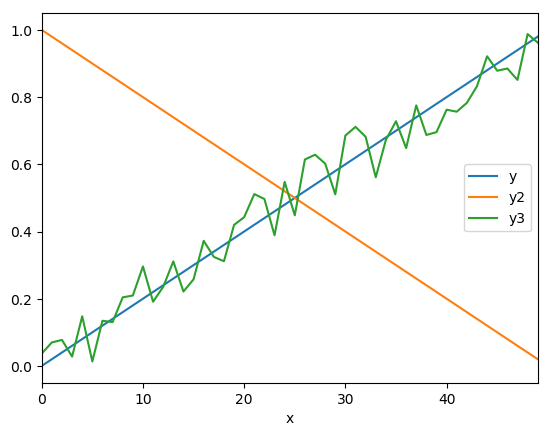

In [13]:
ax = df.plot(kind='line',x='x')
fig = ax.get_figure()

Now we can convert that figure into an interactive chart that we can translate or zoom into. (Run the cell below then hover over the chart; a tool panel appears in the bottom left corner of the chart).

In [16]:
import mpld3
mpld3.display( fig )

We can generate, or save the HTML directly. In the following example, we generate the HTML, then redisplay it in the notebook.

In [19]:
from IPython.display import HTML
HTML( mpld3.fig_to_html( fig ) )

#Save the HTML directly to a file
#!mkdir -p assets
#mpld3.save_html(fig, 'assets/figure.html')

Some of the style features can also be passed into the HTML version of the chart.

Several plugins are also available. For example, we can report the x,y cordinates of the cursor.

In [26]:
from mpld3 import plugins

sns.set_style("darkgrid", {'figure.facecolor': 'lightgreen', 'axes.facecolor':'pink'})
figure = df.plot(kind='line',x='x').get_figure()

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display( fig )

Other charting libraries are available that can be used to construct web charts directly.